In [1]:
from src.utilities import *
from src.functions import *

Exercice credit card

In [2]:
card=pd.read_csv('data/creditcard.csv',sep=',',encoding='utf-8')
labels=card['Class']
card=card.drop(columns=['Time','Class'])
Card=normalisation(card)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    card, labels, test_size=0.3, random_state=1, stratify=labels)
# surechantillonnage de la classe minoritaire
smote=SMOTE(sampling_strategy='minority', random_state=1)
X_train,y_train=smote.fit_resample(X_train,y_train)

Recherche des meilleurs parametres pour chaque modele
Remarque : Le code est commenté car ça prend beaucoup de temps 

In [4]:
#params=[{'n_estimators': [150,200,250]},
#       {'n_neighbors':[3,5,15]},
#       {'n_estimators': [150,200,250]},
#        {'n_estimators': [150,200,250]},
#        {'n_neighbors':[3,5,15]}]
#models=[IsolationForest(random_state=1),LocalOutlierFactor(),RandomForestClassifier(random_state=1),
#         GradientBoostingClassifier(random_state=1), LocalOutlierFactor(novelty=True)]
#best_params={}
#for model,param in zip(models,params):
#    best_param= grid_search_parameters(model, X_train,y_train, param, scoring='balanced_accuracy', cv=3)
#    best_params[type(model).__name__]=best_param

In [5]:
RF=RandomForestClassifier(random_state=1,n_estimators=150)
RF.fit(X_train,y_train)
IF=IsolationForest(random_state=1,n_estimators=200)
IF.fit(X_train)
SVC=SVC(probability=True)
SVC.fit(X_train,y_train)
GBC=GradientBoostingClassifier(random_state=1,n_estimators=150)
GBC.fit(X_train,y_train)
LOF=LocalOutlierFactor(n_neighbors=8,novelty=True)
LOF.fit(X_train)

LocalOutlierFactor(n_neighbors=8, novelty=True)

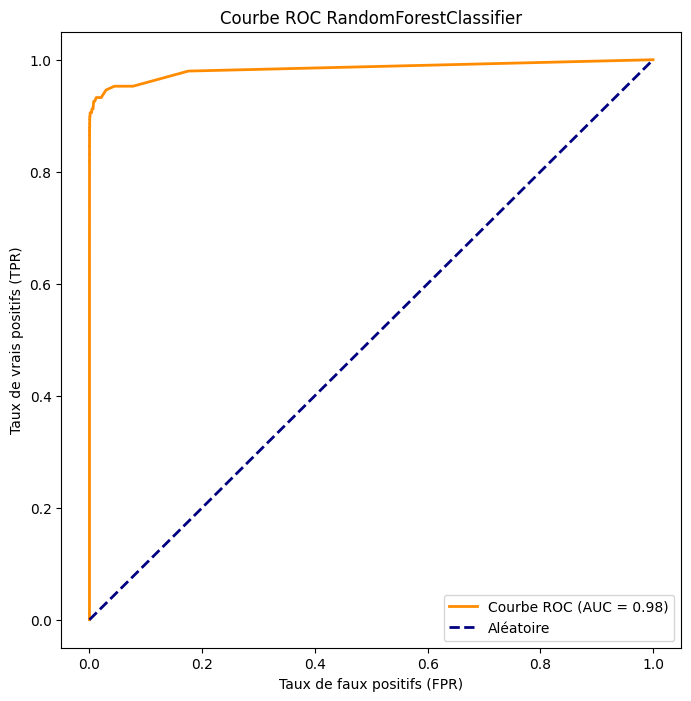

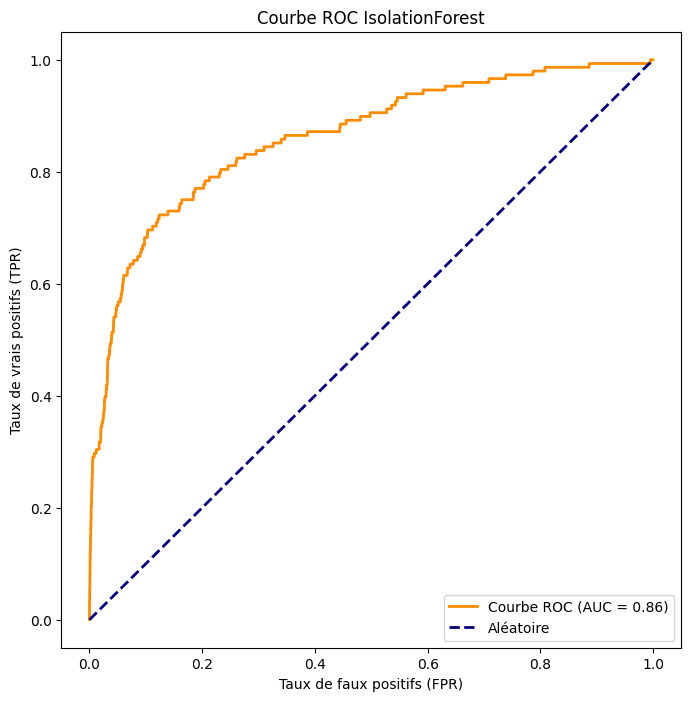

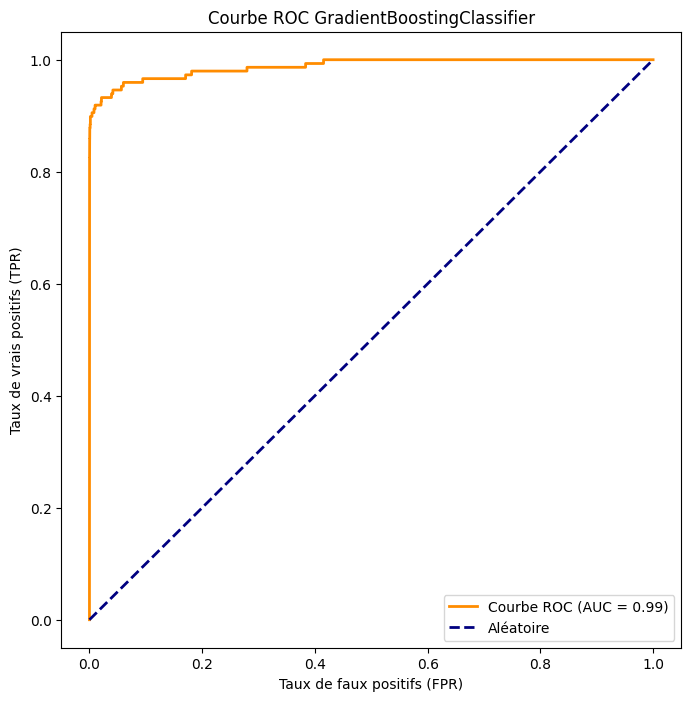

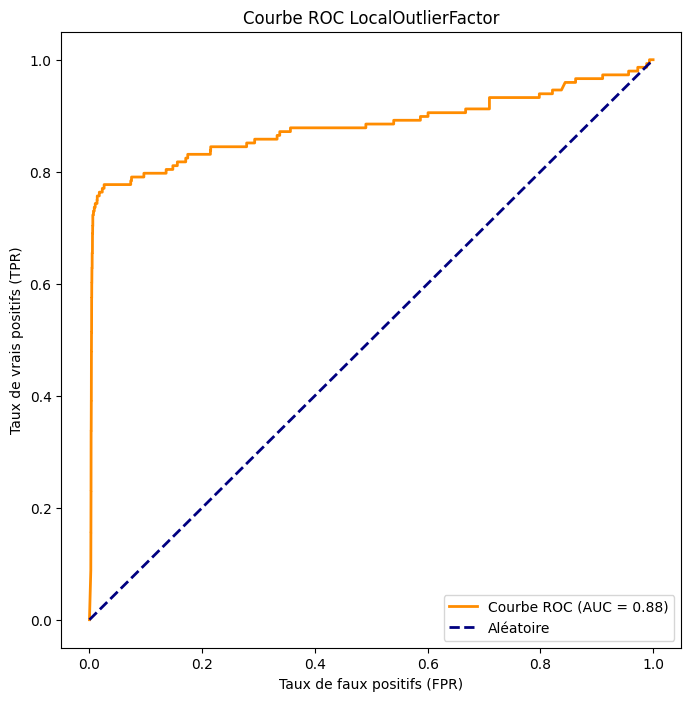

In [7]:
models=[RF,IF,GBC,LOF]
best_model=0
best_metric=0
best_threshold=0
for model in models :
    seuil,balanced_acc=roc(model,X_test,y_test)
    if balanced_acc>best_metric:
        best_metric=balanced_acc
        best_model=model
        best_threshold=seuil

In [8]:
print(f'meilleur modele : {type(best_model).__name__}, balanced accuracy : {best_metric}, meilleur seuil : {best_threshold}')

meilleur modele : RandomForestClassifier, balanced accuracy : 0.9558052894327003, meilleur seuil : 0.02666666666666667
